In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#import file 
data = pd.read_csv('medical_appointment_no_show.csv')
data.drop(['PatientId', 'AppointmentID','ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1, inplace=True)
data['Handcap'] = data['Handcap'].replace([2, 3, 4], pd.NA)
data = data.dropna(subset=['Handcap'])
print(data.describe())








                 Age    Scholarship   Hipertension       Diabetes  \
count  110328.000000  110328.000000  110328.000000  110328.000000   
mean       37.070408       0.098280       0.196831       0.071605   
std        23.098231       0.297694       0.397606       0.257833   
min        -1.000000       0.000000       0.000000       0.000000   
25%        18.000000       0.000000       0.000000       0.000000   
50%        37.000000       0.000000       0.000000       0.000000   
75%        55.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          Alcoholism   SMS_received  
count  110328.000000  110328.000000  
mean        0.030382       0.321179  
std         0.171637       0.466931  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000  


In [3]:
data = pd.get_dummies(data, columns=['Gender','No-show'], drop_first=True)
data[['Gender_M', 'No-show_Yes']] = data[['Gender_M', 'No-show_Yes']].astype(int)


# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Print correlation values
print("Correlation values between columns:")
print(correlation_matrix)


Correlation values between columns:
                   Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
Age           1.000000    -0.092113      0.503677  0.291760    0.095687   
Scholarship  -0.092113     1.000000     -0.019239 -0.024611    0.035224   
Hipertension  0.503677    -0.019239      1.000000  0.432265    0.088087   
Diabetes      0.291760    -0.024611      0.432265  1.000000    0.018635   
Alcoholism    0.095687     0.035224      0.088087  0.018635    1.000000   
Handcap       0.081952    -0.009191      0.081366  0.054717    0.003119   
SMS_received  0.012784     0.001204     -0.006235 -0.014780   -0.026079   
Gender_M     -0.106834    -0.114295     -0.055977 -0.032707    0.105894   
No-show_Yes  -0.060786     0.029392     -0.036174 -0.015168   -0.000244   

               Handcap  SMS_received  Gender_M  No-show_Yes  
Age           0.081952      0.012784 -0.106834    -0.060786  
Scholarship  -0.009191      0.001204 -0.114295     0.029392  
Hipertension  0.081366     

Gender_M
0    14568
1     7710
Name: count, dtype: int64


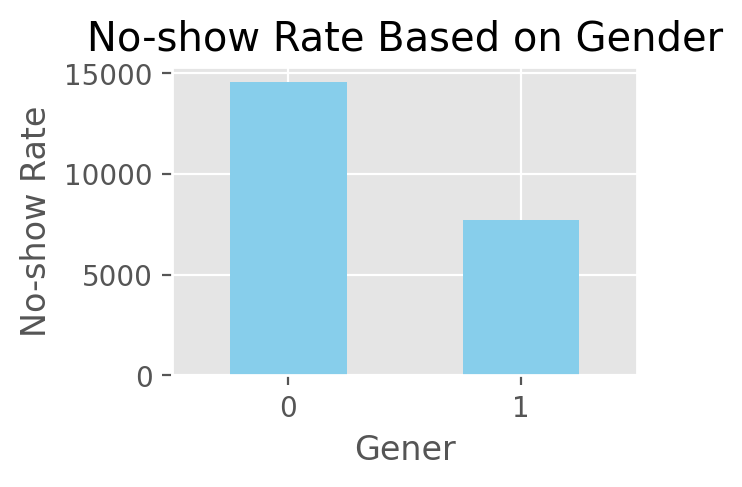

Handcap
0    21912
1      366
Name: count, dtype: int64


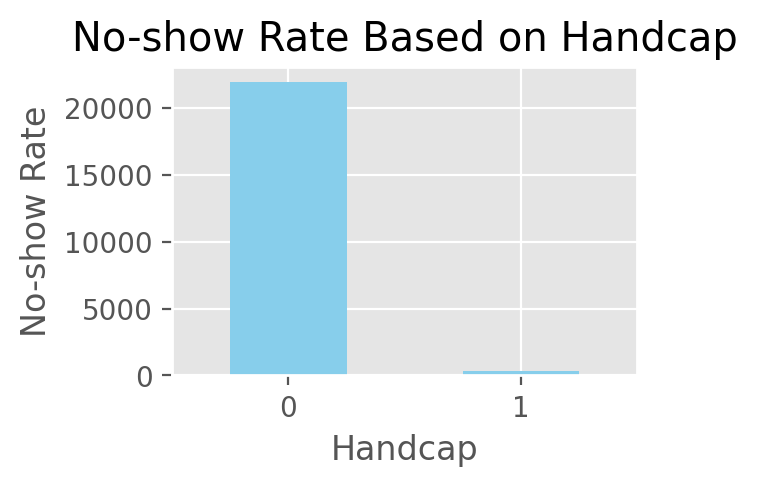

SMS_received
0    12503
1     9775
Name: count, dtype: int64


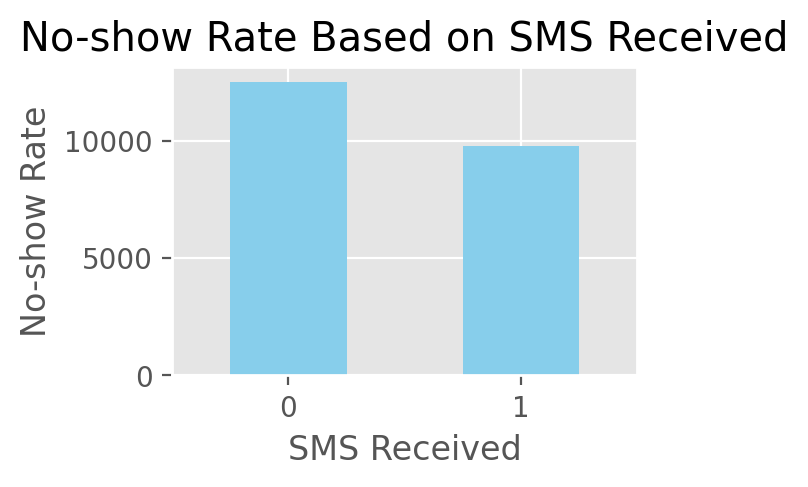

Age_Group
0-9        3482
20-29      3378
30-39      3296
10-19      3252
40-49      2878
50-59      2769
60-69      1786
70-79       900
80-89       453
90-99        81
110-119       3
100-109       0
Name: count, dtype: int64


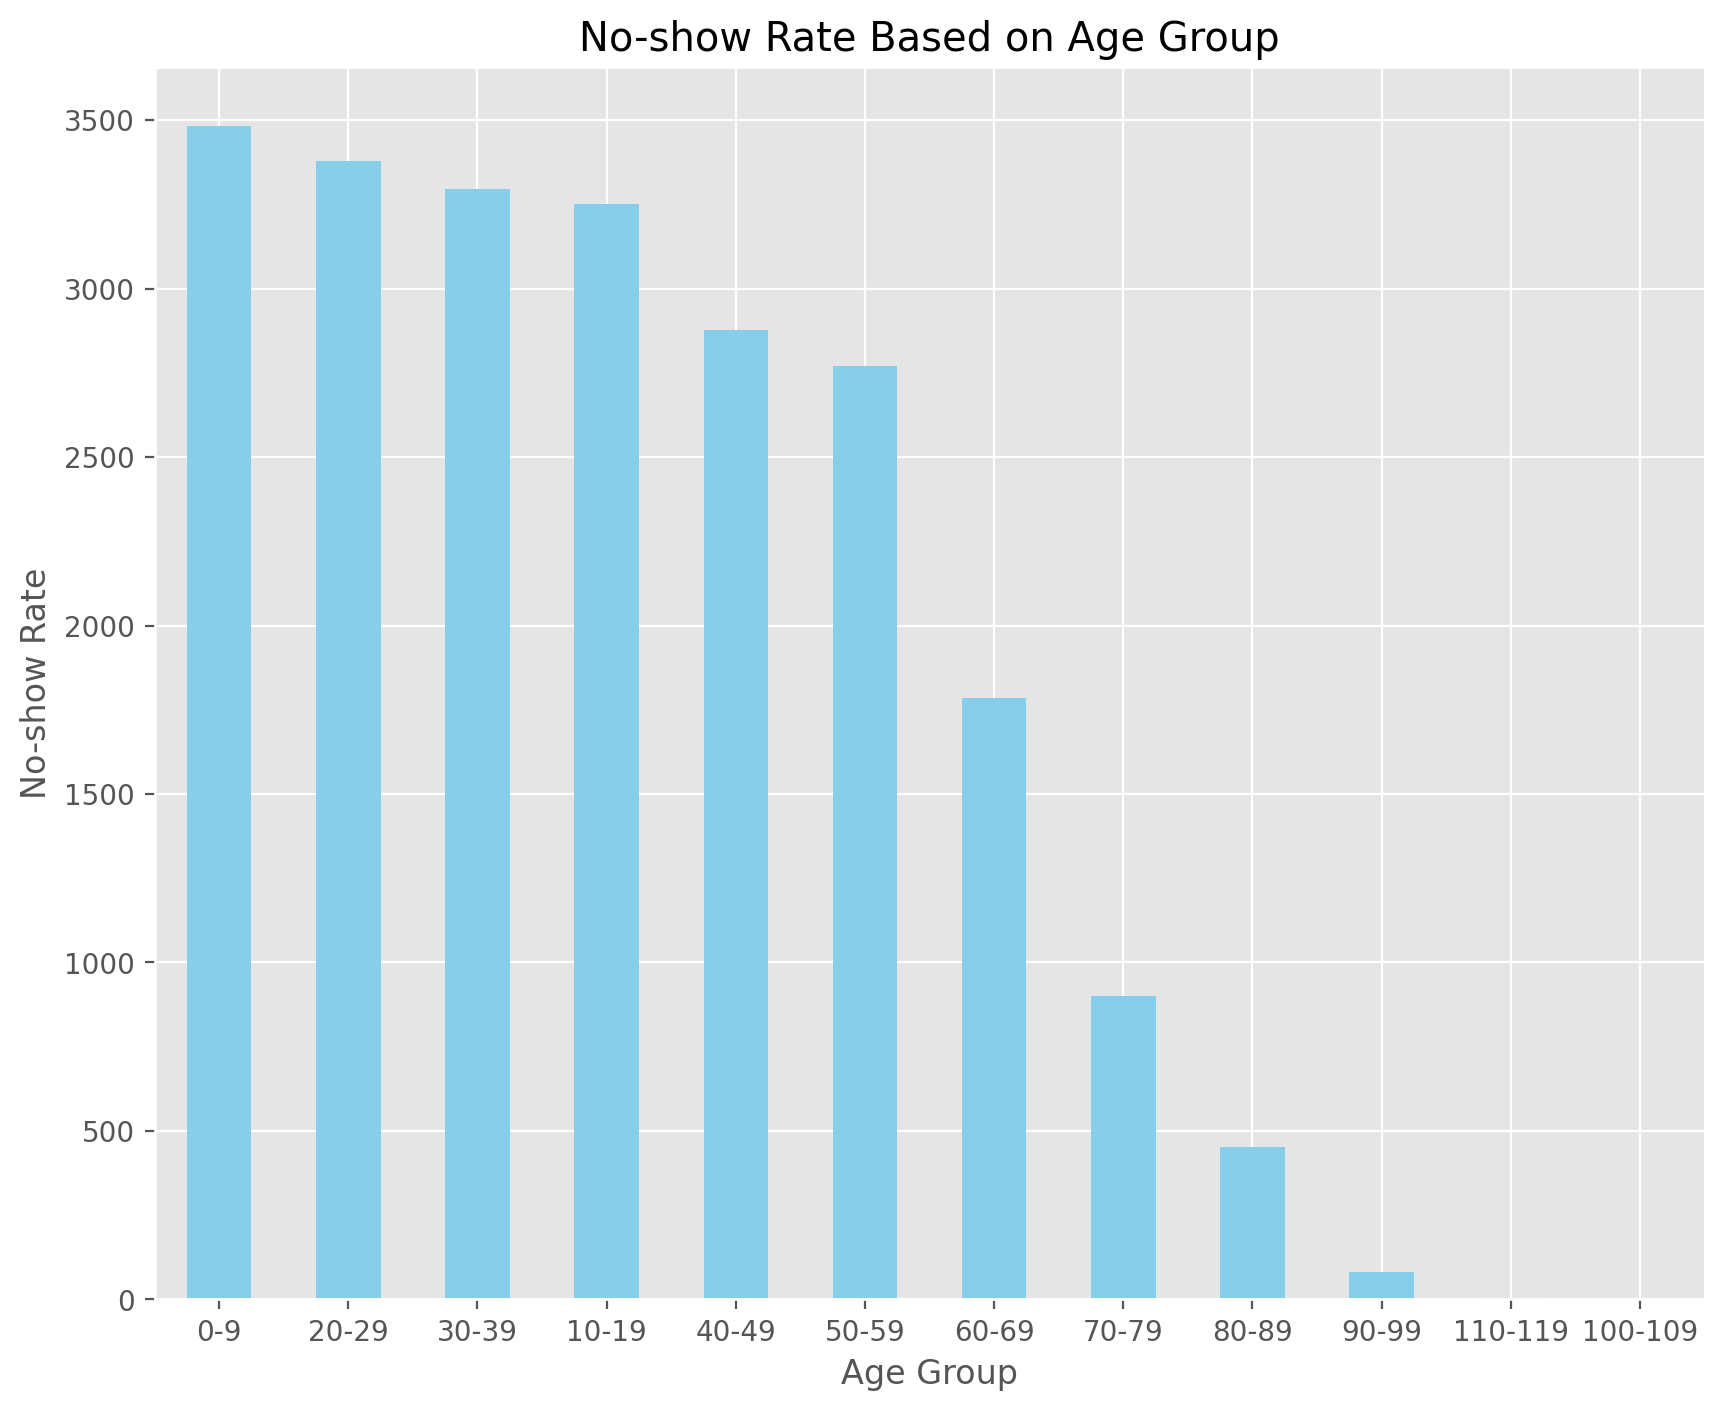

Alcoholism
0    21603
1      675
Name: count, dtype: int64


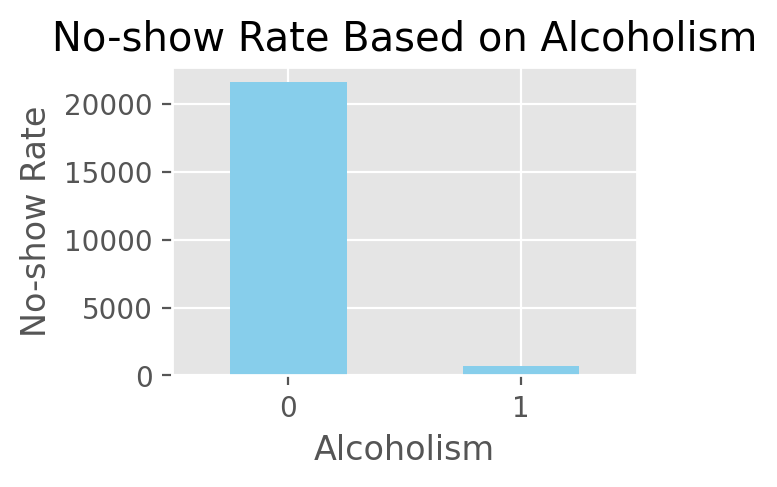

In [4]:
gender_no_show_count = data[data['No-show_Yes']==1]['Gender_M'].value_counts()
print(gender_no_show_count)
plt.figure(figsize=(3, 2))
gender_no_show_count.plot(kind="bar", color="skyblue")
plt.xlabel('Gener')
plt.ylabel('No-show Rate')
plt.title('No-show Rate Based on Gender')
plt.xticks(rotation=0)
plt.show()

Handcap_no_show_count = data[data['No-show_Yes']==1]['Handcap'].value_counts()
print(Handcap_no_show_count)
plt.figure(figsize=(3, 2))
Handcap_no_show_count.plot(kind="bar", color="skyblue")
plt.xlabel('Handcap')
plt.ylabel('No-show Rate')
plt.title('No-show Rate Based on Handcap')
plt.xticks(rotation=0)
plt.show()


SMS_no_show_count = data[data['No-show_Yes']==1]['SMS_received'].value_counts()
print(SMS_no_show_count)
plt.figure(figsize=(3, 2))
SMS_no_show_count.plot(kind="bar", color="skyblue")
plt.xlabel('SMS Received')
plt.ylabel('No-show Rate')
plt.title('No-show Rate Based on SMS Received')
plt.xticks(rotation=0)
plt.show()

# Create bins for age groups with 10-year differences
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Create labels for the bins
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']

# Add a new column 'Age_Group' to the DataFrame
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_no_show_count = data[data['No-show_Yes'] == 1]['Age_Group'].value_counts()
print(age_no_show_count)

plt.figure(figsize=(10, 8))
age_no_show_count.plot(kind="bar", color="skyblue")
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.title('No-show Rate Based on Age Group')
plt.xticks(rotation=0)
plt.show()


alcohol_no_show_count = data[data['No-show_Yes']==1]['Alcoholism'].value_counts()
print(alcohol_no_show_count)
plt.figure(figsize=(3, 2))
alcohol_no_show_count.plot(kind="bar", color="skyblue")
plt.xlabel('Alcoholism')
plt.ylabel('No-show Rate')
plt.title('No-show Rate Based on Alcoholism')
plt.xticks(rotation=0)
plt.show()








Random Forest Classifier:
Accuracy: 0.7976071784646062
Confusion Matrix:
[[17494   173]
 [ 4293   106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17667
           1       0.38      0.02      0.05      4399

    accuracy                           0.80     22066
   macro avg       0.59      0.51      0.47     22066
weighted avg       0.72      0.80      0.72     22066



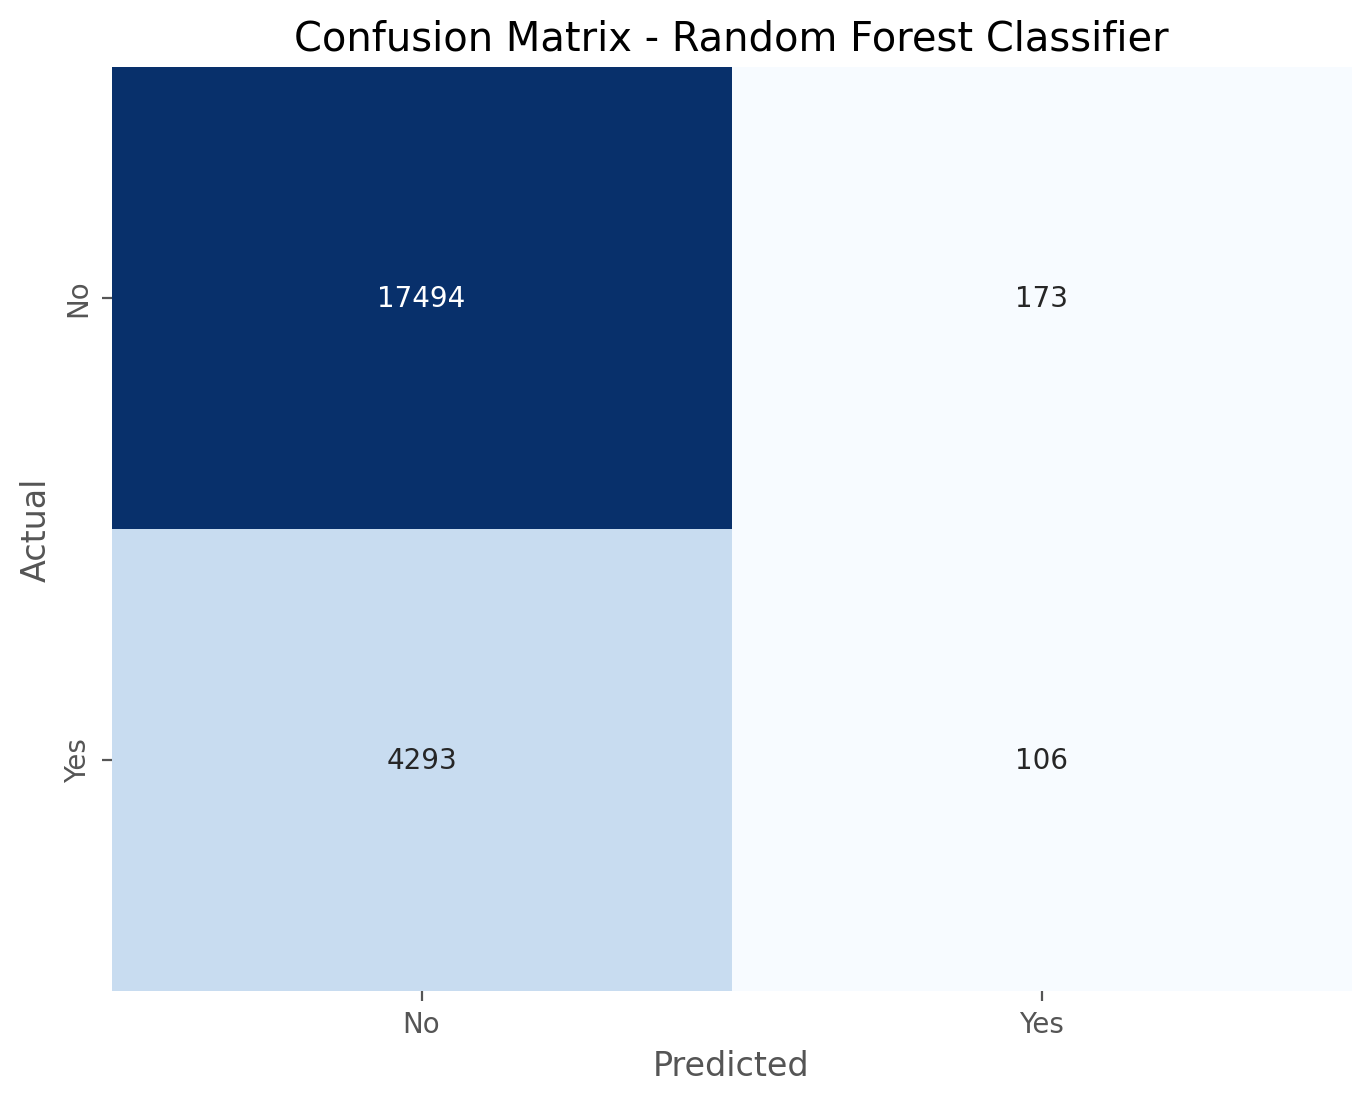

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split the 'Age_Group' column into 'Min_Age' and 'Max_Age'
data[['Min_Age', 'Max_Age']] = data['Age_Group'].str.split('-', expand=True)

# Convert 'Min_Age' and 'Max_Age' to numeric
data['Min_Age'] = pd.to_numeric(data['Min_Age'])
data['Max_Age'] = pd.to_numeric(data['Max_Age'])

# Handle the range as needed (e.g., take the average)
data['Average_Age'] = (data['Min_Age'] + data['Max_Age']) / 2

# Now, you can drop the original 'Age_Group' column and keep the new columns
data = data.drop(['Age_Group'], axis=1)

X = data.drop(['No-show_Yes'], axis=1)
y = data['No-show_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print('Random Forest Classifier:')
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_rep_rf}')

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

